In [3]:
#모델의 성능 평가
from sklearn.metrics import classification_report, confusion_matrix

#Data set 분할 - training, test 
from sklearn.model_selection import train_test_split

#Decision Tree Algorithm 서브 패키지
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

#IPython 내에 정보를 보여주는 도구용 공용 API
#Image: row 데이터가 있는 PNG, JPEG 이미지 객체를 만드는 모듈
from IPython.display import Image

import pandas as pd
import numpy as np

#그래프를 생성하는 graphviz의 Dot 언어를 파이썬 인터페이스에 제공
import pydotplus

#운영체제와 상호작용하기 위한 기본적인 기능 제공
import os

C:\ai\python\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ai\python\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
tennis_data = pd.read_csv("playtennis.csv") #csv 파일 로드, 데이터프레임에 저장
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [8]:
tennis_data.Outlook = tennis_data.Outlook.replace("Sunny", 0)
tennis_data.Outlook = tennis_data.Outlook.replace("Overcast", 1)
tennis_data.Outlook = tennis_data.Outlook.replace("Rain", 2)

tennis_data.Temperature = tennis_data.Temperature.replace("Hot", 1)
tennis_data.Temperature = tennis_data.Temperature.replace("Mild", 2)
tennis_data.Temperature = tennis_data.Temperature.replace("Cool", 3)

tennis_data.Humidity = tennis_data.Humidity.replace("High", 1)
tennis_data.Humidity = tennis_data.Humidity.replace("Normal", 2)

tennis_data.Wind = tennis_data.Wind.replace("Weak", 1)
tennis_data.Wind = tennis_data.Wind.replace("Strong", 2)

tennis_data.PlayTennis = tennis_data.PlayTennis.replace("No", 1)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace("Yes", 2)

tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,1,1,1,1
1,0,1,1,2,1
2,1,1,1,1,2
3,2,2,1,1,2
4,2,3,2,1,2
5,2,3,2,2,1
6,1,3,2,2,2
7,0,2,1,1,1
8,0,3,2,1,2
9,2,2,2,1,2


In [9]:
#Column의 값들을 데이터프레임 형태로 추출, 배열 형태로 변환 후 저장
X = np.array(pd.DataFrame(tennis_data, columns = ["Outlook", "Temperature", "Humidity", "Wind"]))
y = np.array(pd.DataFrame(tennis_data, columns = ["PlayTennis"]))

In [10]:
#train_test_split 모듈을 통해, 훈련 및 테스트 데이터 분할
#train:test = 3(75%): 1(25%)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
#Decision Tree 모듈을 변수에 저장 - Decision Tree 분류 모델 생성 
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)

In [14]:
#X_test 데이터에 대한 클래스 예측값 저장
dt_prediction = dt_clf.predict(X_test)

In [15]:
#Confusion Matrix(오차행렬) : 모델의 예측 결과와 성능을 나타내는 척도
print(confusion_matrix(y_test, dt_prediction))

[[0 1]
 [1 2]]


In [16]:
#정확도 계산
#모델이 정확하게 분류 또는 예측하는 데이터의 비율
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, dt_prediction) #진짜, 예측
print("정확도: ", accuracy)

정확도:  0.5


In [18]:
#IPython 내 그래프 생성을 위한 인터페이스 경로 추가 설정
os.environ["PATH"] += os.pathsep + "C:/ai/program/Graphviz/bin/"

In [19]:
feature_names = tennis_data.columns.tolist() #전체 열
feature_names = feature_names[0:4] #전체 중 일부만

In [20]:
target_name = np.array(["Play No", "Play Yes"])

In [24]:
dt_dot_data = tree.export_graphviz(
    dt_clf, #Decision Tree 분류기
    out_file = None, #파일로 반환하지 않음
    feature_names = feature_names, #각 feature의 이름(문자열)
    class_names = target_name, #각 대상 class의 이름을 오름차순으로 정렬
    filled = True, #노드 색칠
    rounded = True, #둥근 모서리가 있는 노드 상자, Helvetica 글꼴
    special_characters = True #특수문자 표현
)

In [25]:
#Dot 형식의 데이터로 정의된 그래프를 로드
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

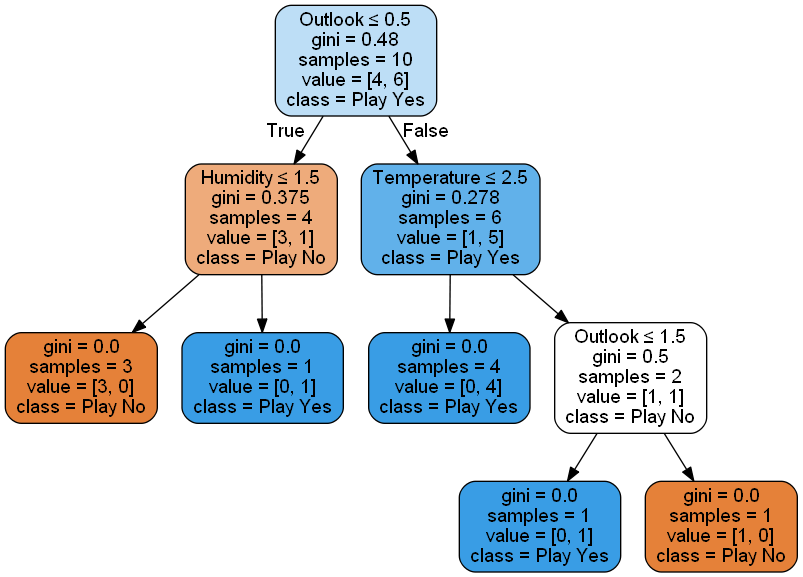

In [26]:
Image(dt_graph.create_png())

In [30]:
future = [
    [0, 2, 1, 1]
]

#No = 1, Yes = 2
dt_clf.predict(future)

array([1], dtype=int64)

In [32]:
future = [
    [1, 2, 2, 1]
]

dt_clf.predict(future)

array([2], dtype=int64)